In [1]:
import h5py
data = h5py.File('data/candidates.h5') #load Dataset

In [2]:
import numpy as np

X_train_pos = [] #Initialize list for all positive (labeled 1) input training samples.
X_train_neg = [] #Initialize list for all negative (labeled 0) input training samples.
X_train = [] #Initialize list for all training input samples.
Y_train = [] #Initialize list for all training target output (labels) samples.
X_val = [] #Initialize list for all validation input samples.
Y_val = [] #Initialize list for all validation target output (labels) samples.
X_test = [] #Initialize list for all test input samples.
Y_test = [] #Initialize list for all test target output (labels) samples.

Samples=len(data) #Total no. of Samples.

print("Total no. of Samples = %d"%Samples)

Train_Samples = (int)(.55*Samples) #55% of Samples for training the model
Val_Samples = (int)(.15*Samples) #15% of Samples for validating the model
Test_Samples = (Samples-(int)(.55*Samples)-(int)(.15*Samples)) #Rest (approx 30%) for testing the model

print("Total no. of Training Samples = %d"%Train_Samples)
print("Total no. of Validation Samples = %d"%Val_Samples)
print("Total no. of Testing Samples = %d"%Test_Samples)

Total no. of Samples = 4148
Total no. of Training Samples = 2281
Total no. of Validation Samples = 622
Total no. of Testing Samples = 1245


In [3]:
Sample = 0

for patch_id in data:
    
    if Sample < Train_Samples: #Will take the first 55% of samples as training sample
        if data[patch_id]['metainfo']['label'][...]==1:
            X_train_pos.append([data[patch_id]['patch'][...]])
            
            """(data[patch_id]['patch'][...] is of the shape 101x101x101
                [data[patch_id]['patch][..]] will change the shape to 1x101x101x101 (numpy.reshape could have been used instead)
                
                this was done since one dimension should specify the no. of channels (1 in this case) 
                to feed the input in the 3d convolutional layer.
                Similar modification is done in all later cases)"""
        else:
            X_train_neg.append([data[patch_id]['patch'][...]])
    
    elif Sample < (Train_Samples+Val_Samples):  #Will take the next 15% of the samples as validation sample
        X_val.append([data[patch_id]['patch'][...]])
        Y_val.append(data[patch_id]['metainfo']['label'][...])
    
    else: #Will take the rest of the samples as test samples
        X_test.append([data[patch_id]['patch'][...]])
        Y_test.append(data[patch_id]['metainfo']['label'][...])
    
    Sample = Sample + 1
    
X_train_pos = np.array(X_train_pos)
X_train_neg = np.array(X_train_neg)
X_val = np.array(X_val)  
Y_val = np.array(Y_val)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print("Total Positive Training Data: "+str(X_train_pos.shape[0]))
print("Total Negative Training Data: "+str(X_train_neg.shape[0]))

Total Positive Training Data: 565
Total Negative Training Data: 1716


In [4]:
#Randomly Distribute positive and negative samples over the general training ndarray

pi = 0 #index for positive training samples
ni = 0 #index for negative training samples

def putpos(pi):
    X_train.append(X_train_pos[pi]) #puts a positive data into the general input training sample.
    Y_train.append(1) #puts the target output label. (1 for positive)
    pi=pi+1 
    return pi #return index for next positive training data

def putneg(ni):
    X_train.append(X_train_neg[ni]) #puts a negative data into the general input training sample.
    Y_train.append(0) #puts the target output label. (0 for negative)
    ni=ni+1 
    return ni #return index for next negative training data

switch = 0

for i in range(0,Train_Samples):
    
    rn = np.random.randint(1,4)
    
    if rn < 3:
        if ni<X_train_neg.shape[0]:
            ni = putneg(ni)
        else: #when no more negative training example remaining
            pi = putpos(pi)
    else:
        if pi<X_train_pos.shape[0]: 
            pi = putpos(pi)
        else: #when no more positive training example remaining
            putneg(ni)
    
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print("Training Input Sample Shape: "+str(X_train.shape))
print("Training output Sample Shape: "+str(Y_train.shape))            
print("Validation Input Sample Shape: "+str(X_val.shape))
print("Validation output Sample Shape: "+str(Y_val.shape))   
print("Testing Input Sample Shape: "+str(X_test.shape))
print("Testing output Sample Shape: "+str(Y_test.shape))   

Training Input Sample Shape: (2281, 1, 101, 101, 101)
Training output Sample Shape: (2281,)
Validation Input Sample Shape: (622, 1, 101, 101, 101)
Validation output Sample Shape: (622,)
Testing Input Sample Shape: (1245, 1, 101, 101, 101)
Testing output Sample Shape: (1245,)


Sample images from training dataset
A true positive training sample


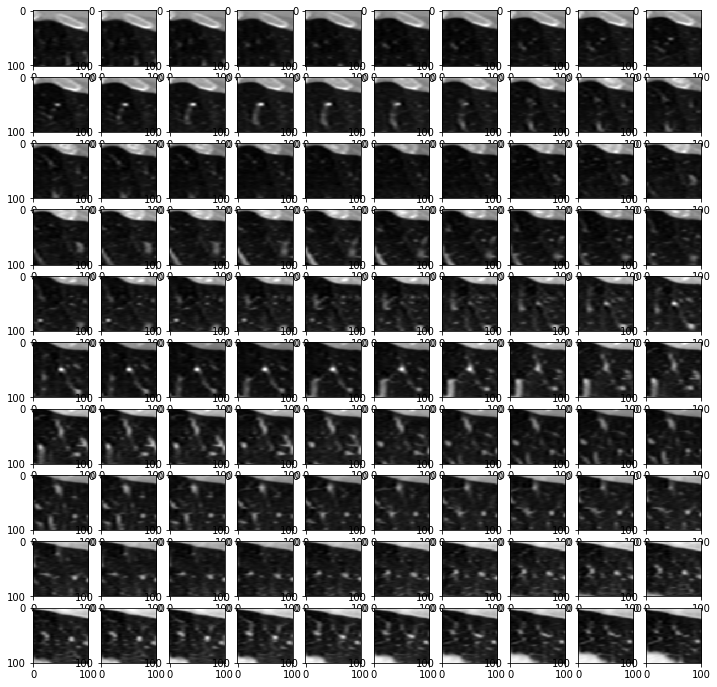

A false positive training sample


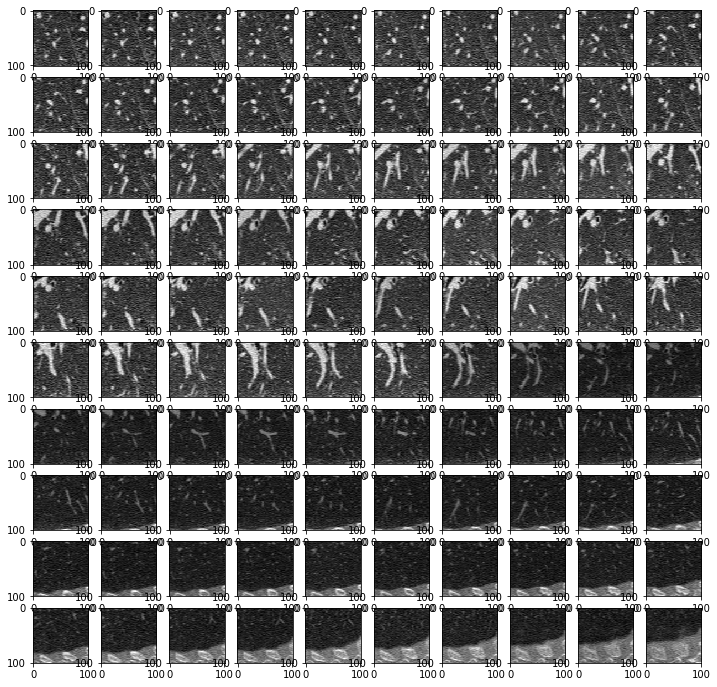

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.misc import toimage

print "Sample images from training dataset"

rnpos = np.random.randint(0,X_train_pos.shape[0])
rnneg = np.random.randint(0,X_train_neg.shape[0])

print "A true positive training sample"

plt.figure(figsize=(12,12))
for i in range(0,100):
    img=toimage(X_train_pos[rnpos][0][i])
    plt.subplot(10,10,i+1)
    plt.imshow(img,cmap='gray')
plt.show()

print "A false positive training sample"

plt.figure(figsize=(12,12))
for i in range(0,100):
    img=toimage(X_train_neg[rnneg][0][i])
    plt.subplot(10,10,i+1)
    plt.imshow(img,cmap='gray')
plt.show()

In [8]:
#Data Preprocessing

#Reducing range of intensity values.
X_train[X_train>1500]=1500  
X_train[X_train<0]=0

X_val[X_val>1500]=1500
X_val[X_val<0]=0

X_test[X_test>1500]=1500
X_test[X_test<0]=0

#Converting to float.
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

#Normalizing (range becomes 0 to 1)
X_train = X_train/1500
X_val = X_val/1500
X_test = X_test/1500

#One Hot Encoding target output samples.

Y_train1H = np.zeros((len(Y_train),2))                                       
Y_test1H = np.zeros((len(Y_test),2))
Y_val1H = np.zeros((len(Y_val),2))

for i in range(0,len(Y_train)):
    Y_train1H[i][int(Y_train[i])]=1
    
for i in range(0,len(Y_test)):
    Y_test1H[i][int(Y_test[i])]=1

for i in range(0,len(Y_val)):
    Y_val1H[i][int(Y_val[i])]=1
    
#Possible improvements that can be made: Data augmenting to increase the size of positive samples.

In [9]:
print X_train[0][0][0]

[[ 0.71933335  0.72333336  0.73133332 ...,  0.69199997  0.67933333
   0.67133331]
 [ 0.73933333  0.74000001  0.74199998 ...,  0.70666665  0.70666665
   0.70733333]
 [ 0.75933331  0.75866669  0.75800002 ...,  0.74066669  0.75266665
   0.75933331]
 ..., 
 [ 0.186       0.17533334  0.15133333 ...,  0.64266664  0.65066665
   0.65466666]
 [ 0.14133333  0.13466667  0.12133333 ...,  0.66133332  0.65799999
   0.65533334]
 [ 0.116       0.11        0.1        ...,  0.66933334  0.648       0.63533336]]


In [10]:
print Y_train[8:20]

[0 1 0 0 1 1 0 0 0 1 0 1]


In [11]:
print Y_train1H[8:20]

[[ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]
 [ 1.  0.]
 [ 0.  1.]]


In [12]:
#Model Design

from keras.models import Sequential
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional import MaxPooling3D
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers.normalization import BatchNormalization #batch Normalization for managing internal covariant shift. 
from keras.layers import Activation
from keras import regularizers

model=Sequential()

model.add(Conv3D(32,  #No. of filters   
                (6,6,6),  #kernel size
                input_shape=(1,101,101,101),
                data_format='channels_first',
                strides=2,
                padding='same',
                use_bias=False,
                kernel_regularizer=regularizers.l2(0.01), 
                kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(3,3,3),strides=2,data_format='channels_first'))

model.add(Conv3D(64,      
                (5,5,5),
                data_format='channels_first',
                strides=1,
                padding='same',
                use_bias=False,
                kernel_regularizer=regularizers.l2(0.01), 
                kernel_initializer='glorot_uniform'))
model.add(BatchNormalization()) 
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(3,3,3),strides=2,data_format='channels_first'))

model.add(Conv3D(96,      
                (3,3,3),
                data_format='channels_first',
                strides=1,
                padding='same',
                use_bias=False,
                kernel_regularizer=regularizers.l2(0.01), 
                kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv3D(128,      
                (3,3,3),
                data_format='channels_first',
                strides=2,
                padding='same',
                use_bias=False,
                kernel_regularizer=regularizers.l2(0.01), 
                kernel_initializer='glorot_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling3D(pool_size=(2,2,2),strides=2,data_format='channels_first'))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(2,activation='softmax'))

epochs=100
learningRate=0.01
decay=learningRate/epochs

sgd = SGD(lr=learningRate,decay=decay,momentum=0.9,nesterov=False)

model.compile(loss='categorical_crossentropy',optimizer='sgd',metrics=['accuracy'])

print model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 32, 51, 51, 51)    6912      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 51, 51, 51)    204       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 51, 51, 51)    0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 32, 25, 25, 25)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 64, 25, 25, 25)    256000    
_________________________________________________________________
batch_normalization_2 (Batch (None, 64, 25, 25, 25)    100       
_________________________________________________________________
activation_2 (Activation)    (None, 64, 25, 25, 25)    0         
__________

In [13]:
#Skip running this part if you are going to use the saved weights and you don't want to train again.

from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping

checkpoint = ModelCheckpoint('Weights.h5',monitor='val_acc',verbose=1,save_best_only=True,save_weights_only=True,mode='max')
#Only save weights for that achieves the best validation accuracy scores at the time

early_stopping = EarlyStopping(monitor='val_loss', patience=3)
#The training will stop if the validation loss does not decrease for 3 epochs.

history = model.fit(X_train,Y_train1H,validation_data=(X_val,Y_val1H),verbose=1,batch_size=8,epochs=epochs,callbacks=[checkpoint,early_stopping])
#Shuffle is true by default.That is samples for batch will be selected randomly at each epoch.


Train on 2281 samples, validate on 622 samples
Epoch 1/100
2281/2281 [==============================] - 62s - loss: 8.0146 - acc: 0.7427 - val_loss: 7.4431 - val_acc: 0.7846
Epoch 2/100
2281/2281 [==============================] - 62s - loss: 7.0694 - acc: 0.7799 - val_loss: 6.8879 - val_acc: 0.7026
Epoch 3/100
2281/2281 [==============================] - 62s - loss: 6.3284 - acc: 0.8062 - val_loss: 5.9912 - val_acc: 0.8023
Epoch 4/100
2281/2281 [==============================] - 62s - loss: 5.6603 - acc: 0.8220 - val_loss: 5.3494 - val_acc: 0.8408
Epoch 5/100
2281/2281 [==============================] - 62s - loss: 5.0222 - acc: 0.8685 - val_loss: 4.7998 - val_acc: 0.8521
Epoch 6/100
2281/2281 [==============================] - 62s - loss: 4.4451 - acc: 0.9062 - val_loss: 4.2821 - val_acc: 0.8907
Epoch 7/100
2281/2281 [==============================] - 62s - loss: 3.9426 - acc: 0.9272 - val_loss: 3.8042 - val_acc: 0.9035
Epoch 8/100
2281/2281 [==============================] - 62s - l

In [14]:
model.load_weights('Weights.h5')
score = model.evaluate(X_val,Y_val1H,verbose=0)
print "Final Validation Accuracy: %.2f%%"%(score[1]*100)

Final Validation Accuracy: 93.89%


In [15]:
model.load_weights('Weights.h5')
score = model.evaluate(X_test,Y_test1H,verbose=1)
print "Test Accuracy: %.2f%%"%(score[1]*100) #Test Accuracy with weights that achieves the best validation accuracy

1245/1245 [==============================] - 14s    
Test Accuracy: 96.47%


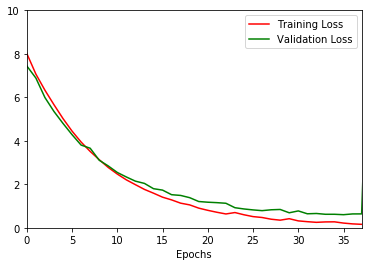

In [19]:
#Skip running this part if didn't train the model this time.

plt.plot(history.history['loss'],'r',label = 'Training Loss')
plt.plot(history.history['val_loss'],'g',label = 'Validation Loss')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.axis([0,37,0,10]) #Graph for first 38 epochs
plt.show()

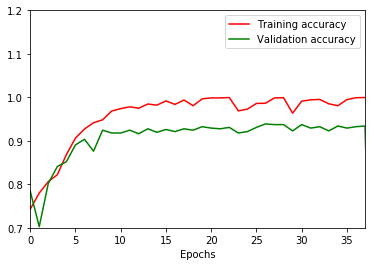

In [20]:
#Skip running this part if didn't train the model this time.

plt.plot(history.history['acc'],'r',label = 'Training accuracy')
plt.plot(history.history['val_acc'],'g',label = 'Validation accuracy')
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.axis([0,37,0.7,1.2]) #Graph for first 38 epochs
plt.show()

thresholds = [ 0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.6   0.61
  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71  0.72  0.73
  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83  0.84  0.85
  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95  0.96  0.97
  0.98  0.99]

An Example Case (Training Sample 349)
Predicted Probability that the sample is positive: 0.001038
Predicted Probability that the sample is negative: 0.998962
The actual label of the sample (0 for negative, 1 for positive): 0

Total No. of Positive samples 253
Total No. of Negative samples 992

No. of predicted True Positives for different thresholds:
[ 218.  218.  217.  217.  217.  217.  217.  217.  217.  217.  217.  217.
  217.  217.  217.  215.  215.  215.  215.  215.  215.  215.  215.  215.
  215.  215.  212.  212.  212.  212.  212.  212.  212.  212.  211.  211.
  211.  211.  211.  209.  208.  206.  206.  206.  205.  205.  198.  195.
  194.  190.]

No. of predicted Fal

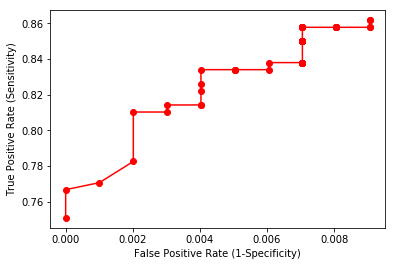



ROC:


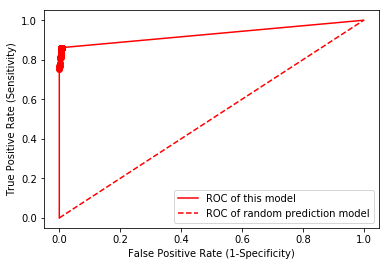

In [28]:
#There's probably better ways to make ROC; may be using skilearn library.

model.load_weights('Weights.h5')

#CONSTRUCTING ROC

threshold = np.arange(0.5,1,0.01) #Prepare threshold values here
#(Start threshold value: 0.5. Stop threshold value: 1.0 step = 0.01 )

#threshold = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] 

print "thresholds = "+str(threshold)+"\n" 

TP = np.zeros([len(threshold)]) #Array of No. of True Positive Predictions for different thresholds
FP = np.zeros([len(threshold)]) #Array of No. True Negative Predictions for different thresholds
P = 0 #Array of No. of total Positive labeled data
N = 0 #Array of No. of total Negative labeled data
TPR = np.zeros([len(threshold)]) ##Array of Rate of True Positive Predictions for different thresholds
FPR = np.zeros([len(threshold)]) ##Array of Rate of True Positive Predictions for different thresholds

def TPFPCalculation(TP,FP,threshold,i,j):   #j=threshold index, i= Test Data index
    if Y_test[i] == 1 and prediction[i][0][1] > threshold[j]:
        TP[j] = TP[j]+1
    elif Y_test[i] == 0 and prediction[i][0][1] > threshold[j]:
        FP[j] = FP[j]+1
    return TP,FP
    
prediction=[]

rn = np.random.randint(0,Test_Samples) #Randomly choose an index of example test case to display later

for i in range(0,Test_Samples):
    prediction.append(model.predict(X_test[i].reshape([1,1,101,101,101]),batch_size=1,verbose=0))
    
    if Y_test[i]==1:
        P=P+1
    else:
        N=N+1
    
    #Will show some examples of predictions 
    if i==rn:
        print "An Example Case (Training Sample %d)"%i
        print "Predicted Probability that the sample is positive: %f"%prediction[i][0][1]
        print "Predicted Probability that the sample is negative: %f"%prediction[i][0][0]
        print "The actual label of the sample (0 for negative, 1 for positive): %d\n"%int(Y_train[i])
        
    for j in range(0,len(threshold)):
        TP,FP = TPFPCalculation(TP,FP,threshold,i,j)

print "Total No. of Positive samples %d"%P
print "Total No. of Negative samples %d"%N

print "\nNo. of predicted True Positives for different thresholds:"
print TP
print "\nNo. of predicted False Positives for different thresholds: "
print FP

for j in range(0,len(threshold)):
    TPR[j] = TP[j]/P
    FPR[j] = FP[j]/N

print "\nTrue Positive Rates for different thresholds:"
print TPR
print "\nFalse Positive Rates for different thresholds:"
print FPR

mTPR = np.zeros([len(FPR)+2])
mFPR = np.zeros([len(FPR)+2])

print "\n\nROC:"
plt.plot(FPR,TPR,'ro')
plt.plot(FPR,TPR,'r')
#plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()


mTPR = np.zeros([len(TPR)+2])
mFPR = np.zeros([len(FPR)+2])

mTPR[0] = 0
mTPR[len(TPR)+1] = 1
mFPR[0] = 0
mFPR[len(FPR)+1] = 1

mTPR[1:len(TPR)+1] = TPR
mFPR[1:len(FPR)+1] = FPR

"""mTPR and mFPR are modified TPR and FPR arrays. Here some values are added (0 and 1) to draw a curve joining the diagonal line  
   that represents equal TPR and FPR""" 

#print mTPR
#print mFPR

print "\n\nROC:"
plt.plot(FPR,TPR,'ro')
plt.plot(np.sort(mFPR),np.sort(mTPR),'r',label='ROC of this model')
plt.plot([0,1],[0,1],'r--',label='ROC of random prediction model')
plt.legend(loc='lower right')
#plt.axis([0,1,0,1])
plt.xlabel('False Positive Rate (1-Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
